## VGG

In [1]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def vgg_block(num_convs, in_channels, out_channels):
    blk = []
    for i in range(num_convs):
        if i == 0:
            blk.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        else:
            blk.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        blk.append(nn.ReLU())
    blk.append(nn.MaxPool2d(kernel_size=2, stride=2)) # 这里会使宽高减半
    return nn.Sequential(*blk)

In [3]:
net = vgg_block(3, 1, 255)
print(net)

Sequential(
  (0): Conv2d(1, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(255, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): Conv2d(255, 255, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [4]:
conv_arch = ((1, 1, 64), (1, 64, 128), (2, 128, 256), (2, 256, 512), (2, 512, 512))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 512 * 7 * 7 # c * w * h
fc_hidden_units = 4096 # 任意

In [5]:
def vgg(conv_arch, fc_features, fc_hidden_units=4096):
    net = nn.Sequential()
    # 卷积层部分
    for i, (num_convs, in_channels, out_channels) in enumerate(conv_arch):
        # 每经过一个vgg_block都会使宽高减半
        net.add_module("vgg_block_" + str(i+1), vgg_block(num_convs, in_channels, out_channels))
    # 全连接层部分
    net.add_module("fc", nn.Sequential(d2l.FlattenLayer(),
                                 nn.Linear(fc_features, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, fc_hidden_units),
                                 nn.ReLU(),
                                 nn.Dropout(0.5),
                                 nn.Linear(fc_hidden_units, 10)
                                ))
    return net

In [6]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0,

In [7]:
X = torch.randn((255, 1, 224, 224), dtype=torch.float)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

vgg_block_1 output shape:  torch.Size([255, 64, 112, 112])
vgg_block_2 output shape:  torch.Size([255, 128, 56, 56])
vgg_block_3 output shape:  torch.Size([255, 256, 28, 28])
vgg_block_4 output shape:  torch.Size([255, 512, 14, 14])
vgg_block_5 output shape:  torch.Size([255, 512, 7, 7])
fc output shape:  torch.Size([255, 10])


In [8]:
conv_arch = ((1, 1, 2), (1, 2, 4), (2, 4, 8), (2, 8, 16), (2, 16, 32))
# 经过5个vgg_block, 宽高会减半5次, 变成 224/32 = 7
fc_features = 32 * 7 * 7 # c * w * h
fc_hidden_units = 512 # 任意

In [9]:
net = vgg(conv_arch, fc_features, fc_hidden_units)
print(net)

Sequential(
  (vgg_block_1): Sequential(
    (0): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_2): Sequential(
    (0): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_3): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vgg_block_4): Sequential(
    (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

In [10]:
batch_size = 128
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size, resize=224)

训练样本集容量: 60000 测试样本集容量: 10000


In [11]:
X = torch.randn((255, 1, 224, 224), dtype=torch.float)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

vgg_block_1 output shape:  torch.Size([255, 2, 112, 112])
vgg_block_2 output shape:  torch.Size([255, 4, 56, 56])
vgg_block_3 output shape:  torch.Size([255, 8, 28, 28])
vgg_block_4 output shape:  torch.Size([255, 16, 14, 14])
vgg_block_5 output shape:  torch.Size([255, 32, 7, 7])
fc output shape:  torch.Size([255, 10])


In [13]:
lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
l_list = mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

training on cpu

epoch 1, loss 0.3713, train acc 0.864, test acc 0.872, time 257.4 sec

epoch 2, loss 0.3199, train acc 0.883, test acc 0.884, time 255.6 sec

epoch 3, loss 0.2924, train acc 0.892, test acc 0.889, time 250.2 sec

epoch 4, loss 0.2683, train acc 0.901, test acc 0.901, time 237.7 sec

epoch 5, loss 0.2507, train acc 0.909, test acc 0.899, time 222.7 sec


-- --

## NiN

In [2]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [3]:
def nin_block(in_channels, out_channels, kernel_size, stride, padding):
    blk = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU(),
                        nn.Conv2d(out_channels, out_channels, kernel_size=1),
                        nn.ReLU())
    return blk

In [4]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, stride=4, padding=0),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(96, 256, kernel_size=5, stride=1, padding=2),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nin_block(256, 384, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, stride=1, padding=1),
    mypytorch.GlobalAvgPool2d(),
    # 将四维的输出转成二维的输出，其形状为(批量大小, 10)
    d2l.FlattenLayer()
)
print(net)

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1))
    (5): ReLU()
  )
  (5): MaxPool2d(kernel_size=3, stri

In [6]:
X = torch.rand(1, 1, 224, 224)
for name, blk in net.named_children():
    X = blk(X)
    print(name, 'output shape: ', X.shape)

0 output shape:  torch.Size([1, 96, 54, 54])
1 output shape:  torch.Size([1, 96, 26, 26])
2 output shape:  torch.Size([1, 256, 26, 26])
3 output shape:  torch.Size([1, 256, 12, 12])
4 output shape:  torch.Size([1, 384, 12, 12])
5 output shape:  torch.Size([1, 384, 5, 5])
6 output shape:  torch.Size([1, 384, 5, 5])
7 output shape:  torch.Size([1, 10, 5, 5])
8 output shape:  torch.Size([1, 10, 1, 1])
9 output shape:  torch.Size([1, 10])


In [15]:
X = torch.tensor([[[[1, 2], [3, 4]], [[2, 3], [4, 5]]], [[[3, 4], [5, 6]], [[4, 5], [6, 7]]]], dtype=torch.float)
print(X)
mean = X.mean(dim=0, keepdim=True)
print(mean)
mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True)
print(mean)
mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
print(mean)

tensor([[[[1., 2.],
          [3., 4.]],

         [[2., 3.],
          [4., 5.]]],


        [[[3., 4.],
          [5., 6.]],

         [[4., 5.],
          [6., 7.]]]])
tensor([[[[2., 3.],
          [4., 5.]],

         [[3., 4.],
          [5., 6.]]]])
tensor([[[[3., 4.]],

         [[4., 5.]]]])
tensor([[[[3.5000]],

         [[4.5000]]]])


## BN批量归一化

In [16]:
def batch_norm(is_training, X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 判断当前模式是训练模式还是预测模式
    if not is_training:
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。这里我们需要保持
            # X的形状以便后面可以做广播运算
            mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # 训练模式下用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y, moving_mean, moving_var

In [24]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        super(BatchNorm, self).__init__()
        # 首先要知道是全连接层还是卷积层
        if num_dims == 2:
            shape = (1, num_features)
        elif num_dims == 4:
            shape = (1, num_features, 1, 1)

        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(shape))  # 使用nn.Parameter会自动加入该层的参数中，参与求梯度
        self.beta = nn.Parameter(torch.zeros(shape))  # 这里用到的是广播机制
        # 不参与求梯度和迭代的变量，全在内存上初始化成0
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.zeros(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var, Module实例的traning属性默认为true, 调用.eval()后设成false
        Y, self.moving_mean, self.moving_var = batch_norm(self.training,
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y


In [33]:
net = BatchNorm(100, 4)
for name, parameter in net.named_parameters():
    print(name, parameter.shape)

gamma torch.Size([1, 100, 1, 1])
beta torch.Size([1, 100, 1, 1])


In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            BatchNorm(6, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            d2l.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            BatchNorm(120, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )

In [38]:
batch_size = 256
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu
epoch 1, loss 1.0054, train acc 0.787, test acc 0.808, time 15.9 sec
epoch 2, loss 0.4627, train acc 0.862, test acc 0.819, time 14.4 sec
epoch 3, loss 0.3689, train acc 0.878, test acc 0.802, time 14.2 sec
epoch 4, loss 0.3307, train acc 0.887, test acc 0.848, time 13.9 sec
epoch 5, loss 0.3090, train acc 0.892, test acc 0.807, time 13.9 sec


[1.0053723520420967,
 0.46273986405514655,
 0.36885760058747963,
 0.3306820125655925,
 0.30900937724620736]

In [41]:
net[1].gamma.view((-1,)), net[1].beta.view((-1,))

(tensor([1.1054, 1.0452, 1.0721, 0.9470, 1.1157, 1.1806],
        grad_fn=<ViewBackward0>),
 tensor([ 0.2615, -0.3247, -0.6514,  0.3120,  0.4704, -0.1435],
        grad_fn=<ViewBackward0>))

In [44]:
net = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            nn.BatchNorm2d(6),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2),
            d2l.FlattenLayer(),
            nn.Linear(16*4*4, 120),
            nn.BatchNorm1d(120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.BatchNorm1d(84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )
print(net)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Sigmoid()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): FlattenLayer()
  (9): Linear(in_features=256, out_features=120, bias=True)
  (10): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Sigmoid()
  (12): Linear(in_features=120, out_features=84, bias=True)
  (13): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Sigmoid()
  (15): Linear(in_features=84, out_features=10, bias=True)
)


In [45]:
batch_size = 256
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu
epoch 1, loss 0.9857, train acc 0.790, test acc 0.815, time 9.9 sec
epoch 2, loss 0.4562, train acc 0.863, test acc 0.763, time 10.3 sec
epoch 3, loss 0.3661, train acc 0.879, test acc 0.843, time 9.5 sec
epoch 4, loss 0.3309, train acc 0.886, test acc 0.854, time 9.6 sec
epoch 5, loss 0.3085, train acc 0.892, test acc 0.877, time 10.0 sec


[0.9856766122452756,
 0.45617678850255117,
 0.36611686646938324,
 0.3309341377400337,
 0.30847947743344817]

-- --

## 残差网络 ResNet

In [25]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
import matplotlib.pylab as plt
import d2lzh_pytorch as d2l
import mypytorch

In [26]:
X = torch.randn((4, 3, 6, 6), dtype=torch.float)
blk = mypytorch.Residual(3, 3)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [27]:
blk = mypytorch.Residual(3, 6, use_1x1conv=True, stride=3)
blk(X).shape

torch.Size([4, 6, 2, 2])

In [28]:
net = nn.Sequential(
        nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
)

In [29]:
def renet_block(in_channels, out_channels, num_residuals, first_block=False):
    if first_block:
        assert in_channels == out_channels
    blks = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blks.append(mypytorch.Residual(in_channels, out_channels, use_1x1conv=True, stride=2))
        else:
            blks.append(mypytorch.Residual(out_channels, out_channels))
    return nn.Sequential(*blks)

In [30]:
net.add_module('resnet_block1', renet_block(64, 64, 2, first_block=True))
net.add_module('resnet_block2', renet_block(64, 128, 2))
net.add_module('resnet_block3', renet_block(128, 256, 2))
net.add_module('resnet_block4', renet_block(256, 512, 2))
net.add_module('global_avg_pool', mypytorch.GlobalAvgPool2d())
net.add_module('fc', nn.Sequential(mypytorch.FlattenLayer(), nn.Linear(512, 10)))
print(net)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (resnet_block1): Sequential(
    (0): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Residual(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [31]:
X = torch.randn((1, 1, 224, 224))
for name, blk in net.named_children():
    X = blk(X)
    print(name, X.shape)

0 torch.Size([1, 64, 112, 112])
1 torch.Size([1, 64, 112, 112])
2 torch.Size([1, 64, 112, 112])
3 torch.Size([1, 64, 56, 56])
resnet_block1 torch.Size([1, 64, 56, 56])
resnet_block2 torch.Size([1, 128, 28, 28])
resnet_block3 torch.Size([1, 256, 14, 14])
resnet_block4 torch.Size([1, 512, 7, 7])
global_avg_pool torch.Size([1, 512, 1, 1])
fc torch.Size([1, 10])


In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 256
# 如出现“out of memory”的报错信息，可减小batch_size或resize
train_iter, test_iter = mypytorch.load_data_fashion_mnist(batch_size, resize=96)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
mypytorch.train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs)

训练样本集容量: 60000 测试样本集容量: 10000
training on cpu
epoch 1, loss 0.4233, train acc 0.845, test acc 0.855, time 696.1 sec


KeyboardInterrupt: 

-- --
# 循环神经网络

In [2]:
import torch

X, W_xh = torch.randn(3, 1), torch.randn(1, 4)
H, W_hh = torch.randn(3, 4), torch.randn(4, 4)
torch.matmul(X, W_xh) + torch.matmul(H, W_hh)

tensor([[-3.7944, -3.0319, -0.0632, -2.9810],
        [-0.0843, -2.3623, -0.8531, -0.3881],
        [-0.7930,  3.1586, -1.6041, -5.7559]])

In [3]:
torch.matmul(torch.cat((X, H), dim=1), torch.cat((W_xh, W_hh), dim=0))

tensor([[-3.7944, -3.0319, -0.0632, -2.9810],
        [-0.0843, -2.3623, -0.8531, -0.3881],
        [-0.7930,  3.1586, -1.6041, -5.7559]])

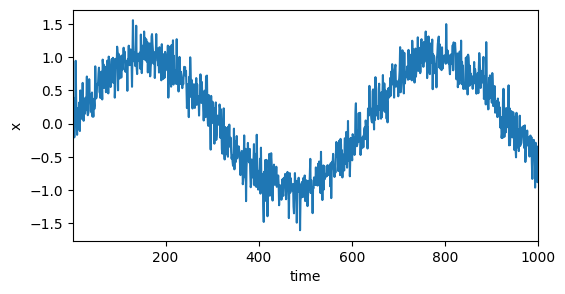

In [9]:
import mypytorch
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
mypytorch.plot(time, x, 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

In [1]:
import torch
import random
import zipfile

with zipfile.ZipFile('data/jaychou_lyrics.txt.zip') as zin:
    with zin.open('jaychou_lyrics.txt') as f:
        corpus_chars = f.read().decode('utf-8')
corpus_chars[:40]

'想要有直升机\n想要和你飞到宇宙去\n想要和你融化在一起\n融化在宇宙里\n我每天每天每'

In [2]:
corpus_chars = corpus_chars.replace('\n', ' ').replace('\r', ' ')
corpus_chars = corpus_chars[0:10000]

In [3]:
idx_to_char = list(set(corpus_chars))
char_to_idx = dict([(char, i) for i, char in enumerate(idx_to_char)])
vocab_size = len(char_to_idx)
vocab_size # 1027

1027

In [4]:
corpus_indices = [char_to_idx[char] for char in corpus_chars]
sample = corpus_indices[:20]
print('chars:', ''.join([idx_to_char[idx] for idx in sample]))
print('indices:', sample)

chars: 想要有直升机 想要和你飞到宇宙去 想要和
indices: [454, 180, 457, 79, 64, 18, 214, 454, 180, 623, 619, 160, 880, 703, 351, 567, 214, 454, 180, 623]


In [5]:
import mypytorch as mp

In [6]:
corpus_indices_test = list(range(30))
random.shuffle(corpus_indices_test)
print(corpus_indices_test)
for X,Y in mp.data_iter_random(corpus_indices_test, 2, 6):
    print('\nX:', X, '\nY:', Y)

[7, 21, 25, 26, 20, 27, 15, 17, 11, 8, 29, 3, 9, 4, 10, 24, 18, 23, 12, 0, 1, 16, 5, 28, 6, 13, 19, 2, 22, 14]

X: tensor([[15., 17., 11.,  8., 29.,  3.],
        [ 7., 21., 25., 26., 20., 27.]]) 
Y: tensor([[17., 11.,  8., 29.,  3.,  9.],
        [21., 25., 26., 20., 27., 15.]])

X: tensor([[12.,  0.,  1., 16.,  5., 28.],
        [ 9.,  4., 10., 24., 18., 23.]]) 
Y: tensor([[ 0.,  1., 16.,  5., 28.,  6.],
        [ 4., 10., 24., 18., 23., 12.]])


In [7]:
corpus_indices_test = list(range(30))
random.shuffle(corpus_indices_test)
print(corpus_indices_test)
for X,Y in mp.data_iter_consecutive(corpus_indices_test, 2, 6):
    print('\nX:', X, '\nY:', Y)

[2, 0, 23, 16, 5, 17, 8, 15, 4, 3, 14, 13, 6, 25, 7, 28, 27, 20, 18, 12, 19, 10, 29, 9, 22, 24, 26, 1, 21, 11]

X: tensor([[ 2.,  0., 23., 16.,  5., 17.],
        [28., 27., 20., 18., 12., 19.]]) 
Y: tensor([[ 0., 23., 16.,  5., 17.,  8.],
        [27., 20., 18., 12., 19., 10.]])

X: tensor([[ 8., 15.,  4.,  3., 14., 13.],
        [10., 29.,  9., 22., 24., 26.]]) 
Y: tensor([[15.,  4.,  3., 14., 13.,  6.],
        [29.,  9., 22., 24., 26.,  1.]])


####  代码实现

In [2]:
import torch
from torch import nn
import mypytorch as mp

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
corpus_chars, idx_to_char, vocab_size, corpus_indices = mp.load_data_jay_lyrics()

In [4]:
x = torch.arange(10).view(2, 5)
inputs = mp.to_onehot(x, vocab_size)
print(len(inputs), inputs[0].shape)

5 torch.Size([2, 1027])


In [ ]:
def init_parameter(num_inputs, num_hidden, num_outputs, device=None):
    if device is None
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # 隐藏层参数
    W_xh = mp._one((num_inputs, num_hidden), device)
    W_hh = mp._one((num_hidden, num_hidden), device)
    b_h = mp._zero(num_hidden, device)
    # 输出层参数
    W_hq = mp._one((num_hidden, num_outputs), device)
    b_q = mp._zero(num_outputs, device)
    return nn.ParameterList([W_xh, W_hh, b_h, W_hq, b_q])